In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Exploring Data

In [11]:
df = pd.read_csv(r"D:\McDonalds Case Study\McDonalds Case Study\mcdonalds.csv")

In [12]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [13]:
df.shape

(1453, 15)

In [14]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [15]:
new_df = df.loc[:,'yummy':'disgusting']

In [16]:
def yesRno_to_num(data):
    data = data.applymap(lambda x: 1 if x == 'Yes' else 0)
    return data


In [17]:
new_df = yesRno_to_num(new_df)

C:\Users\vk100\AppData\Local\Temp\ipykernel_3208\1990023092.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x == 'Yes' else 0)


In [18]:
new_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [20]:
np.round(np.mean(new_df,axis=0),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_df_scaled = sc.fit_transform(new_df)

In [22]:
new_df_scaled

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.339489  ,
         2.00690848, -0.56648839],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.74655335,
         2.00690848, -0.56648839],
       [-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882,  1.76526126]])

In [23]:
#Principal components analysis on scaled data
from sklearn.decomposition import PCA
# Fit PCA
pca = PCA()
MD_pca = pca.fit_transform(new_df_scaled)

# Print summary
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

summary_data = {
    'PC': range(1, len(explained_variance_ratio) + 1),
    'Standard deviation': pca.singular_values_,
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_variance_ratio
}

summary_df = pd.DataFrame(summary_data)

summary_df

,PC,Standard deviation,Proportion of Variance,Cumulative Proportion
0,1,63.911793,0.255566,0.255566
1,2,48.693327,0.148348,0.403914
2,3,44.781385,0.125469,0.529383
3,4,39.631361,0.098270,0.627653
4,5,36.528314,0.083484,0.711136
5,6,33.708274,0.071091,0.782227
6,7,32.228320,0.064986,0.847213
7,8,29.336002,0.053845,0.901058
8,9,27.590573,0.047628,0.948686
9,10,21.141079,0.027964,0.976650


Text(0, 0.5, 'Principal Component 2')

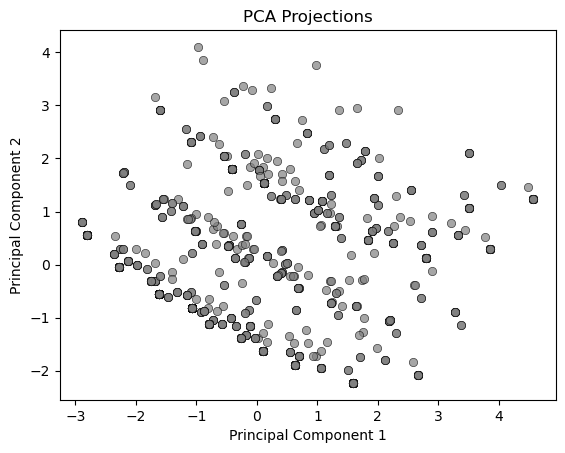

In [24]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey', alpha=0.7, edgecolors='k', linewidths=0.5)
plt.title('PCA Projections')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Extracting Segments

# Using k-Means

In [25]:
from sklearn.cluster import KMeans
    
inertia_values = []
for i in range(1,9):
    inertia_values.append(KMeans(n_clusters=i, n_init=10, random_state=1234).fit(new_df_scaled))
    

In [ ]:
# Plot the scree plot
plt.plot(range(1, 9), [kmeans.inertia_ for kmeans in inertia_values], marker="o")
plt.xlabel("number of segments")
plt.title('Scree Plot for KMeans Clustering')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

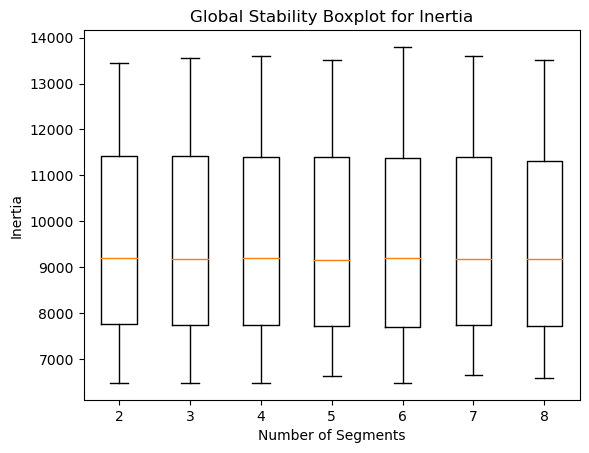

In [31]:
from sklearn.utils import resample

# Function to perform KMeans clustering and calculate inertia
def kmeans_and_inertia(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(data)
    inertia = kmeans.inertia_
    return inertia

# Global stability analysis for each number of segments using bootstrap
n_rep = 10
n_boot = 100
n_clusters_range = range(2, 9)

bootstrap_inertia_values = []

for rep in range(n_rep):
    inertia_replicates = []
    
    for n_clusters in n_clusters_range:
        inertia_samples = []
        
        for _ in range(n_boot):
            # Bootstrap resampling
            resampled_data = resample(new_df_scaled, replace=True, random_state=np.random.randint(1, 1000))
            inertia_samples.append(kmeans_and_inertia(resampled_data, n_clusters))
        
        inertia_replicates.append(inertia_samples)
    
    bootstrap_inertia_values.append(inertia_replicates)

# Flatten the 3D list to a 2D list
flattened_inertia_values = np.array(bootstrap_inertia_values).reshape(-1, len(n_clusters_range))

# Plot the global stability boxplot for inertia
plt.boxplot(flattened_inertia_values, labels=[str(n_clusters) for n_clusters in n_clusters_range])
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.title('Global Stability Boxplot for Inertia')
plt.show()

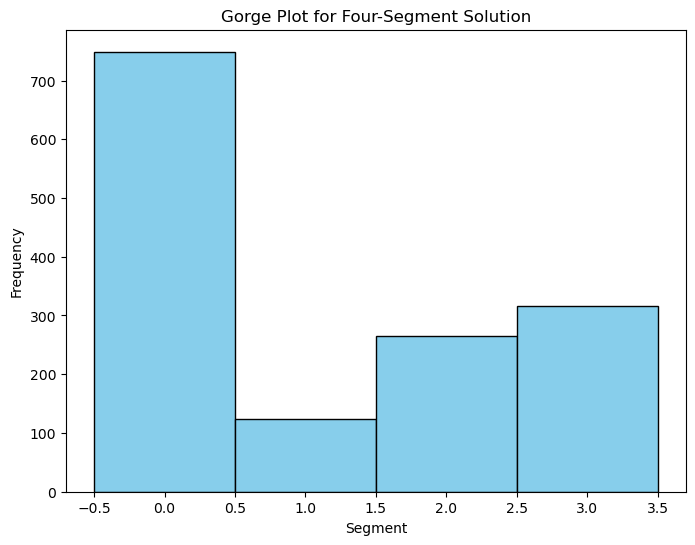

In [34]:
from sklearn_extra.cluster import KMedoids
MD_kmeans = KMeans(n_clusters=4, random_state=1234).fit(new_df_scaled)

# Gorge plot for the four-segment solution
plt.figure(figsize=(8, 6))
plt.hist(MD_kmeans.labels_, bins=np.arange(5)-0.5, edgecolor='black', color='skyblue')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.title('Gorge Plot for Four-Segment Solution')
plt.show()


C:\Users\vk100\AppData\Local\Temp\ipykernel_3208\3880243844.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transitions = labels_df.diff(axis=1).applymap(lambda x: 1 if x != 0 else 0)


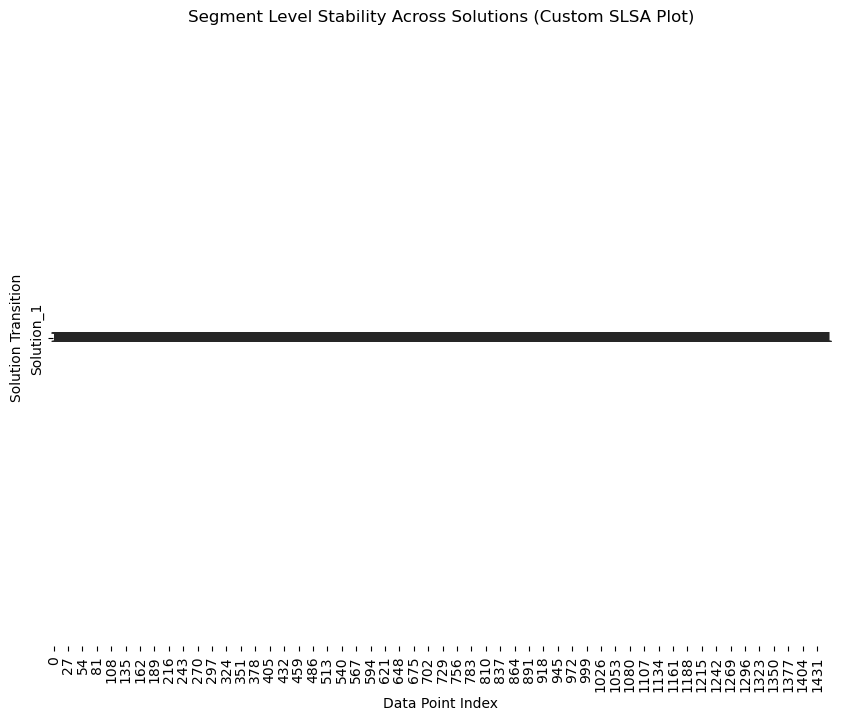

In [28]:
from kmodes.kmodes import KModes
import seaborn as sns

MD_kmeans = KMeans(n_clusters=4, random_state=1234).fit(new_df_scaled)

# Get the labels from different solutions
labels_1 = MD_kmeans.labels_
# You might have labels from other solutions as well, e.g., labels_2, labels_3, ...

# Create a DataFrame with the labels
labels_df = pd.DataFrame({'Solution_1': labels_1})
# Add other solutions if available: labels_df['Solution_2'] = labels_2, ...

# Compute transitions between solutions
transitions = labels_df.diff(axis=1).applymap(lambda x: 1 if x != 0 else 0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transitions.T, cmap='Blues', cbar=False, annot=True, fmt='g', linewidths=.5)
plt.title('Segment Level Stability Across Solutions (Custom SLSA Plot)')
plt.xlabel('Data Point Index')
plt.ylabel('Solution Transition')
plt.show()

# Using Mixtures of Distributions

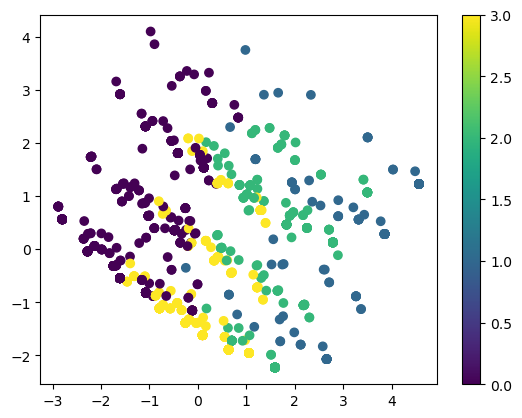

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming new_df_scaled is your scaled data
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(new_df_scaled)

# Assuming MD_kmeans.labels_ is the cluster labels from KMeans
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_kmeans.labels_, cmap="viridis")
plt.colorbar()
plt.show()


In [32]:
MD_k4 = MD_kmeans.labels_
MD_m4a = GaussianMixture(n_components=4, random_state=1234).fit(new_df_scaled).predict(new_df_scaled)
print(pd.crosstab(MD_k4, MD_m4a))

col_0    0    1   2    3
row_0                   
0      679   11   8   51
1        0  123   0    0
2        0    0  48  217
3        0    0   5  311


In [33]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [34]:
np.flip(np.unique(df['Like'], return_counts=True)[1])

array([143, 152, 169,  71,  73,  59,  58, 160, 229, 187, 152], dtype=int64)

In [35]:
test = df["Like"].to_numpy()

In [36]:
unique = np.unique(test, return_counts=True)

In [37]:
unique

(array(['+1', '+2', '+3', '+4', '-1', '-2', '-3', '-4', '0',
        'I hate it!-5', 'I love it!+5'], dtype=object),
 array([152, 187, 229, 160,  58,  59,  73,  71, 169, 152, 143], dtype=int64))

In [39]:
test[test=='I hate it!-5']='-5'
test[test=='I love it!+5']='+5'

In [40]:
df['Like'] = test

In [41]:
df['Like_n'] = pd.to_numeric(df['Like'])

In [42]:
df['Like_n']

0      -3
1       2
2       1
3       4
4       2
       ..
1448   -5
1449    2
1450    3
1451    4
1452   -3
Name: Like_n, Length: 1453, dtype: int64

In [43]:
X_2 = yesRno_to_num(df)

C:\Users\vk100\AppData\Local\Temp\ipykernel_3208\1990023092.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x == 'Yes' else 0)


In [44]:
X_2['Like_n'] = df['Like_n']

In [45]:
X_2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n
0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,-3
1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,4
4,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,2


In [46]:
X_2_scale = sc.fit_transform(X_2)

In [47]:
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=0)
gmm.fit(X_2_scale)

GaussianMixture(n_components=2, n_init=10, random_state=1234)

In [83]:
df['cluster'] = gmm.predict(X_2_scale)

In [84]:
df['cluster']

0       1
1       0
2       0
3       0
4       1
       ..
1448    1
1449    0
1450    0
1451    0
1452    1
Name: cluster, Length: 1453, dtype: int64

In [51]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,1,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,4,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2,1


In [52]:
like_n = df['Like_n'].values
clusters = df['cluster'].values

In [53]:
like_n

array([-3,  2,  1, ...,  3,  4, -3], dtype=int64)

In [54]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame({'Like_n': like_n, 'Cluster': clusters})
model = ols('Like_n ~ Cluster', data=df).fit()
anova_results = anova_lm(model)

print(anova_results)

              df       sum_sq      mean_sq           F         PR(>F)
Cluster      1.0  5652.385816  5652.385816  970.218421  1.556793e-163
Residual  1451.0  8453.366421     5.825890         NaN            NaN


C:\ProgramData\Anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\ProgramData\Anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\ProgramData\Anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


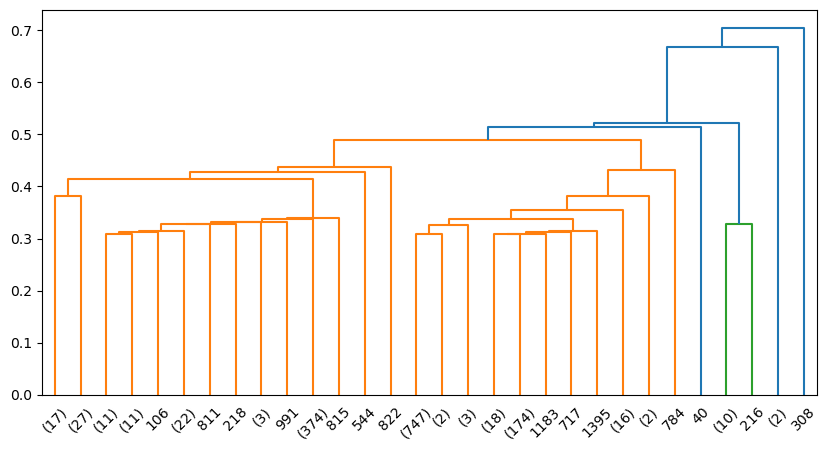

In [56]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.cluster import adjusted_rand_score


X_2_pca= PCA(n_components=2).fit_transform(X_2_scale)
X_2_dist = pdist(X_2_pca)
X_2_link = linkage(X_2_dist)
plt.figure(figsize=(10, 5))
dendrogram(X_2_link, orientation='top', distance_sort='descending',truncate_mode='lastp' ,show_leaf_counts=True)
plt.show()

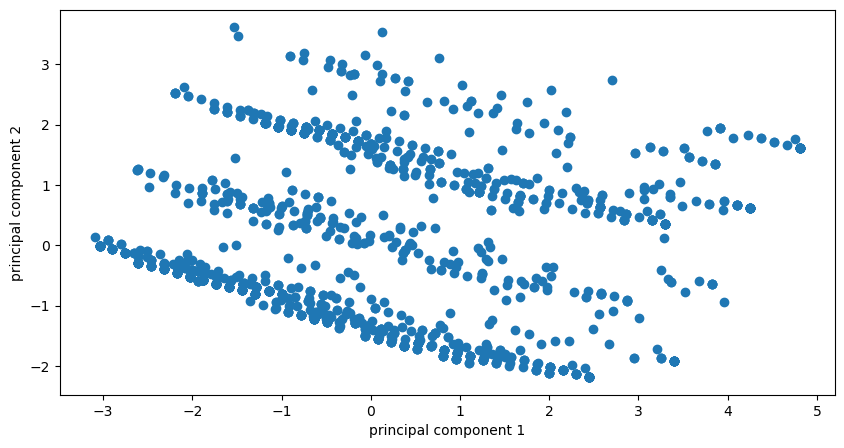

In [57]:
# MD_k4 = GaussianMixture(n_components=4, random_state=1234).fit(MD_x)
plt.figure(figsize=(10, 5))
plt.scatter(X_2_pca[:, 0], X_2_pca[:, 1])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [ ]:
from rpart import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Define your feature variables (X) and target variable (y)
X = X_2.loc['Like':'Gender']
y = df['cluster']# Assuming 'k4' is a binary target variable

# Define the tree formula
tree_formula = "y ~ Like + Age + VisitFrequency + Gender"



# Create and fit the DecisionTreeClassifier
tree = DecisionTreeClassifier(tree_formula)
tree.fit(X, y)

# Plot the tree
tree.plot()
plt.show()